In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# each point is length, width, type (1=red, 0=blue)

data = [[3  , 1.5, 1],
        [2  , 1  , 0],
        [4  , 1.5, 1],
        [3  , 1  , 0],
        [3.5,  .5, 1],
        [2  ,  .5, 0],
        [5.5, 1  , 1],
        [1  , 1  , 0]]

mystery_flower = [4.5, 1]

In [4]:
data[1]

[2, 1, 0]

In [5]:
# network

#   0     flower type      
#  / \    w1,w2,b
# 0   0   length, width

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

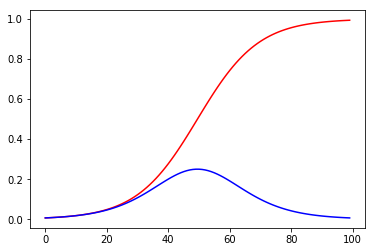

In [7]:
T = np.linspace(-5,5,100)
plt.plot(sigmoid(T), c='r')
plt.plot(sigmoid_p(T), c='b')

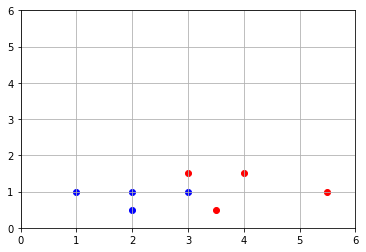

In [8]:
# scatter data
plt.axis([0,6,0,6])
plt.grid()

for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c=color)

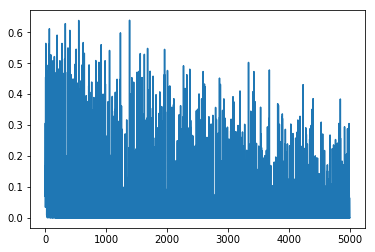

In [9]:
# training loop

learning_rate = 0.2
costs = []

for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
        
    target = point[2]
    cost = np.square(pred - target)

    if i % 10 == 0:
        costs.append(cost)
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
    dcost_db = dcost_pred * dpred_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
plt.plot(costs)